In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st

In [94]:
df_usa = pd.read_csv("C:/git/pythonML/pythonML/data/housesalesprediction/kc_house_data.csv")

In [95]:
print(df_usa.shape)
df_usa.nunique()

(21613, 21)


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [96]:
df_usa.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


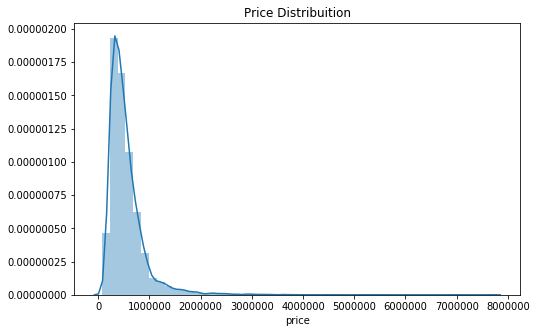

In [97]:
plt.figure(figsize = (8, 5))
plt.title('Price Distribuition')
sns.distplot(df_usa['price'])

plt.show()

In [98]:
import numpy as np
from sklearn.model_selection import train_test_split
print(df_usa['price'].count())
train, test = train_test_split(df_usa.drop(['id', 'date'], axis=1), shuffle=True, random_state=42)
train['price'].count()
train_data = train.drop(['price'], axis=1)
train_targets = train['price']
test_data = test.drop(['price'], axis=1)
test_targets = test['price']

21613


In [99]:
train_targets.head()

5945     268643.0
8423     245000.0
13488    200000.0
20731    352499.0
2358     232000.0
Name: price, dtype: float64

In [110]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_data_set = sc.fit_transform(train_data)
print(train_data['bedrooms'])
test_data_set = sc.fit_transform(test_data)
print(len(test_data_set))
train_data_set[0]
# test_data_set = test_data

5945     4
8423     3
13488    4
20731    2
2358     3
6417     4
937      2
8541     3
15214    3
19665    3
14872    5
11728    5
8474     4
2134     4
4965     4
9722     4
21170    4
2774     3
17206    4
11265    3
3119     0
19639    3
18251    3
1210     4
9431     2
18029    4
1085     4
8517     3
10476    4
7144     4
        ..
3005     4
19118    2
189      3
2747     5
18431    3
18942    2
8666     3
6396     3
19769    3
20939    4
17568    4
6420     4
5051     3
5311     3
2433     3
769      3
1685     4
8322     3
16023    3
11363    4
14423    0
4426     3
16850    3
6265     5
11284    5
11964    3
21575    3
5390     3
860      1
15795    4
Name: bedrooms, Length: 16209, dtype: int64
5404


array([0.12121212, 0.28125   , 0.1292517 , 0.00748965, 0.4       ,
       0.        , 0.        , 0.5       , 0.5       , 0.17736289,
       0.        , 0.53043478, 0.        , 0.27272727, 0.44784085,
       0.27574751, 0.21700224, 0.00986619])

In [101]:
import keras
from keras import models
from keras import layers
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='linear',
                           input_shape=(train_data_set.shape[1],)))
    model.add(layers.Dense(128, activation='linear'))
    model.add(layers.Dense(64, activation='linear'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [102]:

# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data_set, train_targets,
          epochs=80, batch_size=32, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data_set, test_targets)
print(test_mse_score)
test_mae_score

Epoch 1/80
16209/16209 [==============================] - 1s 62us/step - loss: 334973640918.7943 - mean_absolute_error: 448711.2900
Epoch 2/80
16209/16209 [==============================] - 1s 38us/step - loss: 94833008509.1019 - mean_absolute_error: 191968.4097
Epoch 3/80
16209/16209 [==============================] - 1s 40us/step - loss: 81691998869.0609 - mean_absolute_error: 180289.8275
Epoch 4/80
16209/16209 [==============================] - 1s 39us/step - loss: 69480751520.4481 - mean_absolute_error: 163865.7012
Epoch 5/80
16209/16209 [==============================] - 1s 39us/step - loss: 57952443603.3196 - mean_absolute_error: 146287.9542
Epoch 6/80
16209/16209 [==============================] - 1s 40us/step - loss: 50515206441.9323 - mean_absolute_error: 134042.3370
Epoch 7/80
16209/16209 [==============================] - 1s 39us/step - loss: 47265463625.7092 - mean_absolute_error: 131023.8318
Epoch 8/80
16209/16209 [==============================] - 1s 39us/step - loss: 455

422773.9535760548